# Importazioni

In [ ]:
#Standard libraries for data analysis:  
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm

# sklearn modules for data preprocessing:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#sklearn modules for Model Selection:
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#sklearn modules for Model Evaluation & Improvement:    
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score

#Standard libraries for data visualization:
import seaborn as sn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sn.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve
    
import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib

In [ ]:
from importlib_metadata import version
print("Versione libreria pandas: " + version('pandas'))
print("Versione libreria numpy: " + version('numpy'))
print("Versione libreria re: " + version('regex'))
print("Versione libreria scipy: " + version('scipy'))
print("Versione libreria matplotlib: " + version('matplotlib'))
print("Versione libreria seaborn: " + version('seaborn'))
print("Versione libreria scikit-learn: " + version('scikit-learn'))
print("Versione libreria joblib: " + version('joblib'))

Versione libreria pandas: 1.3.5
Versione libreria numpy: 1.21.6
Versione libreria re: 2022.6.2
Versione libreria scipy: 1.7.3
Versione libreria matplotlib: 3.2.2
Versione libreria seaborn: 0.11.2
Versione libreria scikit-learn: 1.0.2
Versione libreria joblib: 1.1.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [ ]:
BASE_PATH = '/content/drive/MyDrive/Progetto_Web/Dataset_Clean/'

In [ ]:
#Importation of Datasets
# df1: contiene informazioni sugli abbonamenti fedeltà di ciascun account cliente
df1 = pd.read_csv(BASE_PATH + 'df1.csv', sep = ',', na_values = '', encoding = 'latin-1')
# df2: contiene informazioni su ciascun account cliente e descrive le caratteristiche di esse, tra la prima tabella e la seconda ci sono dei duplicati, 
# per esempio, perché un cliente può avere più tessere fedeltà o la stessa tessera fedeltà può appartenere a più clienti
df2 = pd.read_csv(BASE_PATH + 'df2.csv', sep = ',', na_values = '', encoding = 'latin-1')
# df3: contiene informazioni sull'indirizzo corrispondente a un account cliente
df3 = pd.read_csv(BASE_PATH + 'df3.csv', sep = ',', na_values = '', encoding = 'latin-1')
# df4: contiene informazioni sulle politiche sulla privacy accettate da ciascun cliente
df4 = pd.read_csv(BASE_PATH + 'df4.csv', sep = ',', na_values = '', encoding = 'latin-1')

# df7: contiene le transazioni di acquisto e rimborso di ciascun cliente, è una delle parti più cospicue di questa base di dati
# df7 = pd.read_csv(BASE_PATH + 'df7.csv', sep = ',', na_values = '', encoding = 'latin-1')

df7_churn_tot = pd.read_csv(BASE_PATH + 'df7_churn.csv', sep = ',', na_values = '', encoding = 'latin-1')
df7_churn = df7_churn_tot[['ID_CLI', 'CHURN']]

# Merge

In [ ]:
df = pd.merge(left=df1, right=df2, how='inner', on='ID_CLI')
pd.merge(left=df, right=df3, how='inner', on='ID_ADDRESS')
pd.merge(left=df, right=df4, how='inner', on='ID_CLI')

,ID_CLI,ID_FID,LAST_COD_FID,LAST_TYP_CLI_FID,LAST_STATUS_FID,LAST_DT_ACTIVE,FIRST_ID_NEG,FIRST_DT_ACTIVE,NUM_FIDs,EMAIL_PROVIDER,W_PHONE,ID_ADDRESS,TYP_CLI_ACCOUNT,TYP_JOB,FLAG_PRIVACY_1,FLAG_PRIVACY_2,FLAG_DIRECT_MKT
0,199060,928121,PREMIUM BIZ,1,1,2019-05-11,19,2018-02-18,2,gmail.com,1.0,181695,2,(missing),1,1,0
1,613049,928118,PREMIUM,1,1,2019-05-11,21,2019-03-30,2,email.it,1.0,596934,4,(missing),1,0,1
2,648813,928116,STANDARD,1,1,2019-05-10,1,2018-10-27,3,gmail.com,1.0,633078,4,(missing),1,1,1
3,914880,928115,STANDARD,1,1,2019-05-10,43,2019-04-15,2,gmail.com,1.0,885965,4,(missing),1,1,1
4,342639,928112,PREMIUM BIZ,1,1,2019-05-09,26,2018-04-29,2,hotmail.com,1.0,321438,2,(missing),1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369467,105948,10,STANDARD,1,1,2018-01-01,3,2018-01-01,1,hotmail.it,1.0,91059,4,(missing),1,1,1
369468,105946,8,STANDARD,1,1,2018-01-01,43,2018-01-01,1,hotmail.it,1.0,91057,4,(missing),1,1,1
369469,105944,6,STANDARD,1,1,2018-01-01,27,2018-01-01,1,gmail.com,1.0,91055,4,(missing),1,1,1
369470,105942,4,STANDARD,1,1,2018-01-01,46,2018-01-01,1,hotmail.it,1.0,91053,4,(missing),1,1,1


In [ ]:
df = pd.merge(left=df, right=df7_churn, how='inner', on='ID_CLI')

In [ ]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['ID_CLI', 'ID_FID', 'LAST_TYP_CLI_FID', 'LAST_STATUS_FID', 'FIRST_ID_NEG', 'NUM_FIDs', 'ID_ADDRESS', 'TYP_CLI_ACCOUNT', 'CHURN'], float64: ['W_PHONE'], object: ['LAST_COD_FID', 'LAST_DT_ACTIVE', 'FIRST_DT_ACTIVE', 'EMAIL_PROVIDER', 'TYP_JOB']}

In [ ]:
df.isna().any()

ID_CLI              False
ID_FID              False
LAST_COD_FID        False
LAST_TYP_CLI_FID    False
LAST_STATUS_FID     False
LAST_DT_ACTIVE      False
FIRST_ID_NEG        False
FIRST_DT_ACTIVE     False
NUM_FIDs            False
EMAIL_PROVIDER      False
W_PHONE             False
ID_ADDRESS          False
TYP_CLI_ACCOUNT     False
TYP_JOB             False
CHURN               False
dtype: bool

In [ ]:
#df.to_csv('df_tot.csv', index=False)

In [ ]:
df.corr()

,ID_CLI,ID_FID,LAST_TYP_CLI_FID,LAST_STATUS_FID,FIRST_ID_NEG,NUM_FIDs,W_PHONE,ID_ADDRESS,TYP_CLI_ACCOUNT,CHURN
ID_CLI,1.000000,0.755832,-0.032555,0.009151,-0.088129,-0.015456,-0.009934,0.916259,0.102399,-0.085347
ID_FID,0.755832,1.000000,0.011966,0.012299,-0.065352,0.030159,-0.052809,0.754918,0.036226,-0.133129
LAST_TYP_CLI_FID,-0.032555,0.011966,1.000000,0.061480,0.005690,0.004586,0.077604,0.002789,-0.016559,-0.012295
LAST_STATUS_FID,0.009151,0.012299,0.061480,1.000000,0.012292,-0.011670,-0.001375,-0.003148,0.022342,-0.051156
FIRST_ID_NEG,-0.088129,-0.065352,0.005690,0.012292,1.000000,-0.014011,-0.006805,-0.081812,-0.021752,-0.001296
NUM_FIDs,-0.015456,0.030159,0.004586,-0.011670,-0.014011,1.000000,-0.024876,-0.010998,-0.011176,-0.012470
W_PHONE,-0.009934,-0.052809,0.077604,-0.001375,-0.006805,-0.024876,1.000000,-0.022527,0.005453,0.028764
ID_ADDRESS,0.916259,0.754918,0.002789,-0.003148,-0.081812,-0.010998,-0.022527,1.000000,0.107364,-0.095246
TYP_CLI_ACCOUNT,0.102399,0.036226,-0.016559,0.022342,-0.021752,-0.011176,0.005453,0.107364,1.000000,0.039335
CHURN,-0.085347,-0.133129,-0.012295,-0.051156,-0.001296,-0.012470,0.028764,-0.095246,0.039335,1.000000


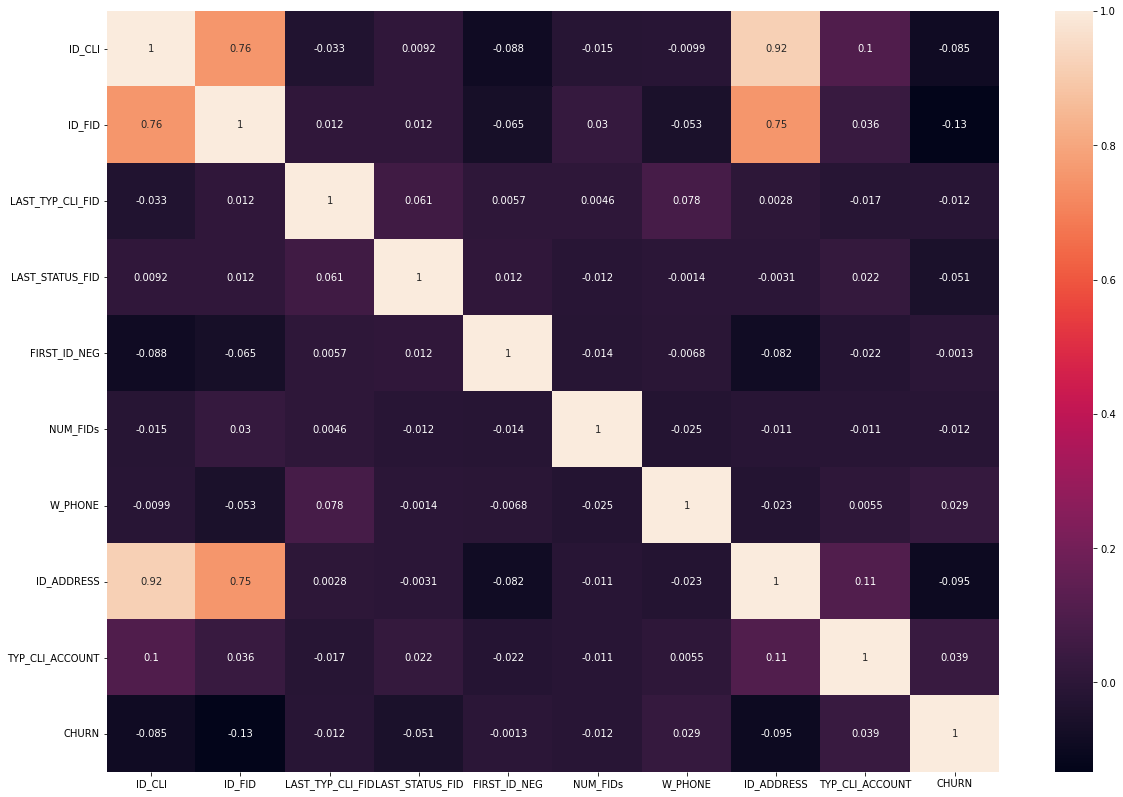

In [ ]:
corr_df = df.corr(method='pearson')

plt.figure(figsize=(20, 14))
sn.heatmap(corr_df, annot=True)
plt.show()

In [ ]:
df.drop(columns = ['ID_ADDRESS'], inplace = True)
df.reset_index(inplace = True, drop = True)

In [ ]:
# df = df[:7000].drop('TYP_CLI_ACCOUNT', axis = 1).copy()
df = df.copy()

In [ ]:
df

,ID_CLI,ID_FID,LAST_COD_FID,LAST_TYP_CLI_FID,LAST_STATUS_FID,LAST_DT_ACTIVE,FIRST_ID_NEG,FIRST_DT_ACTIVE,NUM_FIDs,EMAIL_PROVIDER,W_PHONE,TYP_CLI_ACCOUNT,TYP_JOB,CHURN
0,199060,928121,PREMIUM BIZ,1,1,2019-05-11,19,2018-02-18,2,gmail.com,1.0,2,(missing),1
1,199060,928121,PREMIUM BIZ,1,1,2019-05-11,19,2018-02-18,2,gmail.com,1.0,2,(missing),1
2,199060,928121,PREMIUM BIZ,1,1,2019-05-11,19,2018-02-18,2,gmail.com,1.0,2,(missing),1
3,199060,928121,PREMIUM BIZ,1,1,2019-05-11,19,2018-02-18,2,gmail.com,1.0,2,(missing),1
4,199060,928121,PREMIUM BIZ,1,1,2019-05-11,19,2018-02-18,2,gmail.com,1.0,2,(missing),1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3900371,105941,3,STANDARD,1,1,2018-01-01,9,2018-01-01,1,hotmail.com,1.0,4,(missing),0
3900372,105941,3,STANDARD,1,1,2018-01-01,9,2018-01-01,1,hotmail.com,1.0,4,(missing),0
3900373,105941,3,STANDARD,1,1,2018-01-01,9,2018-01-01,1,hotmail.com,1.0,4,(missing),0
3900374,105941,3,STANDARD,1,1,2018-01-01,9,2018-01-01,1,hotmail.com,1.0,4,(missing),0


# Modello


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900376 entries, 0 to 3900375
Data columns (total 14 columns):
 #   Column            Dtype  
---  ------            -----  
 0   ID_CLI            int64  
 1   ID_FID            int64  
 2   LAST_COD_FID      object 
 3   LAST_TYP_CLI_FID  int64  
 4   LAST_STATUS_FID   int64  
 5   LAST_DT_ACTIVE    object 
 6   FIRST_ID_NEG      int64  
 7   FIRST_DT_ACTIVE   object 
 8   NUM_FIDs          int64  
 9   EMAIL_PROVIDER    object 
 10  W_PHONE           float64
 11  TYP_CLI_ACCOUNT   int64  
 12  TYP_JOB           object 
 13  CHURN             int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 416.6+ MB


In [ ]:
df["CHURN"].value_counts()

0    2323879
1    1576497
Name: CHURN, dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


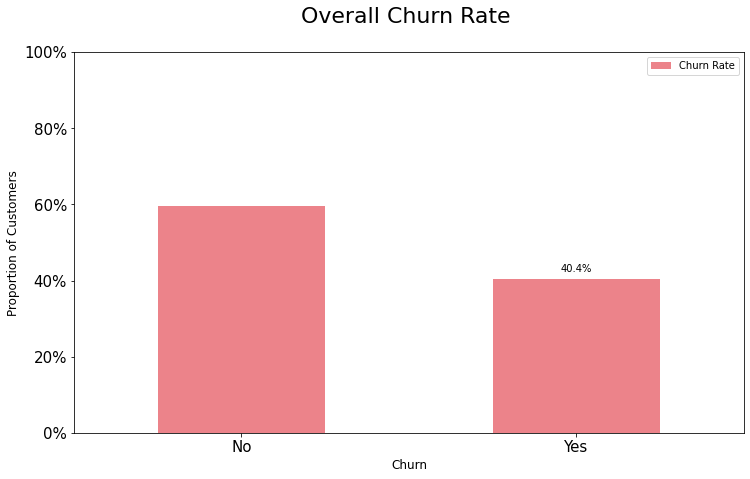

In [ ]:
import matplotlib.ticker as mtick

churn_rate = df[["CHURN", "ID_CLI"]]
churn_rate["churn_label"] = pd.Series(np.where((churn_rate["CHURN"] == 0), "No", "Yes"))
sectors = churn_rate.groupby("churn_label")
churn_rate = pd.DataFrame(sectors["ID_CLI"].count())
churn_rate ["Churn Rate"] = (churn_rate ["ID_CLI"]/sum(churn_rate ["ID_CLI"]))*100

ax = churn_rate[["Churn Rate"]].plot.bar(title = 'Overall Churn Rate', legend = True, table = False, grid = False, subplots = False,
                                         figsize = (12, 7), color = '#ec838a', fontsize = 15, stacked = False, ylim = (0,100))

plt.ylabel('Proportion of Customers', horizontalalignment="center", fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Churn', horizontalalignment="center", fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Overall Churn Rate \n', horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")

#plt.legend(loc ='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
x_labels = np.array(churn_rate[["ID_CLI"]])

def add_value_labels(ax, spacing=5):   
  for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width()/2
    space = spacing
    va = 'bottom'
    if y_value < 0:
      space *= -1
      va = 'top'
    label = "{:.1f}%".format(y_value)
  ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center',va=va)

add_value_labels(ax)
ax.autoscale(enable=False, axis='both', tight=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Unrecognized location 'top right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if sys.path[0] == '':


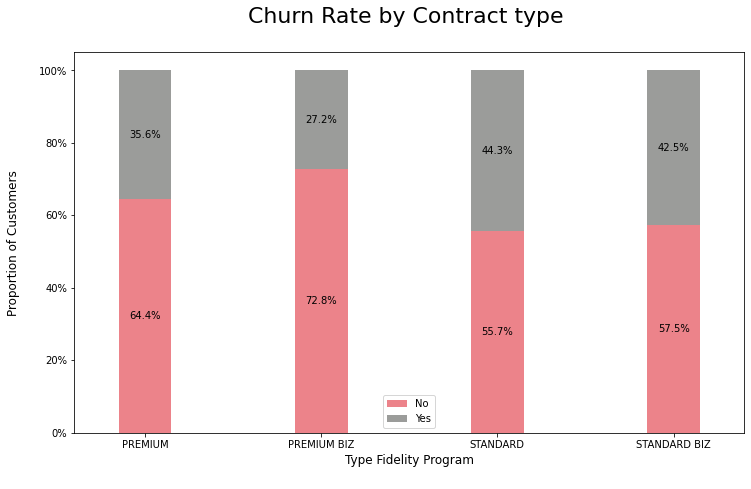

In [ ]:
import matplotlib.ticker as mtick
contract_churn = df.groupby(['LAST_COD_FID','CHURN']).size().unstack()
contract_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)
colors  = ['#ec838a','#9b9c9a']
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0,figsize = (12,7),color = colors)
plt.ylabel('Proportion of Customers\n', horizontalalignment="center",fontstyle = "normal", 
           fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Type Fidelity Program\n',horizontalalignment="center", fontstyle = "normal", fontsize = "large", 
           fontfamily = "sans-serif")
plt.title('Churn Rate by Contract type \n', horizontalalignment="center", fontstyle = "normal", 
          fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, y+height/2, '{:.1f}%'.format(height), horizontalalignment='center', verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)

Si nota che gli utenti con un programma di fedeltà standard hanno più probabilità di essere dei churn.

Most Positive Correlations: 
 TYP_CLI_ACCOUNT    0.039335
W_PHONE            0.028764
dtype: float64

Most Negative Correlations: 
 FIRST_ID_NEG       -0.001296
LAST_TYP_CLI_FID   -0.012295
NUM_FIDs           -0.012470
LAST_STATUS_FID    -0.051156
dtype: float64


Text(0.5, 1.0, 'Correlation with Churn Rate \n')

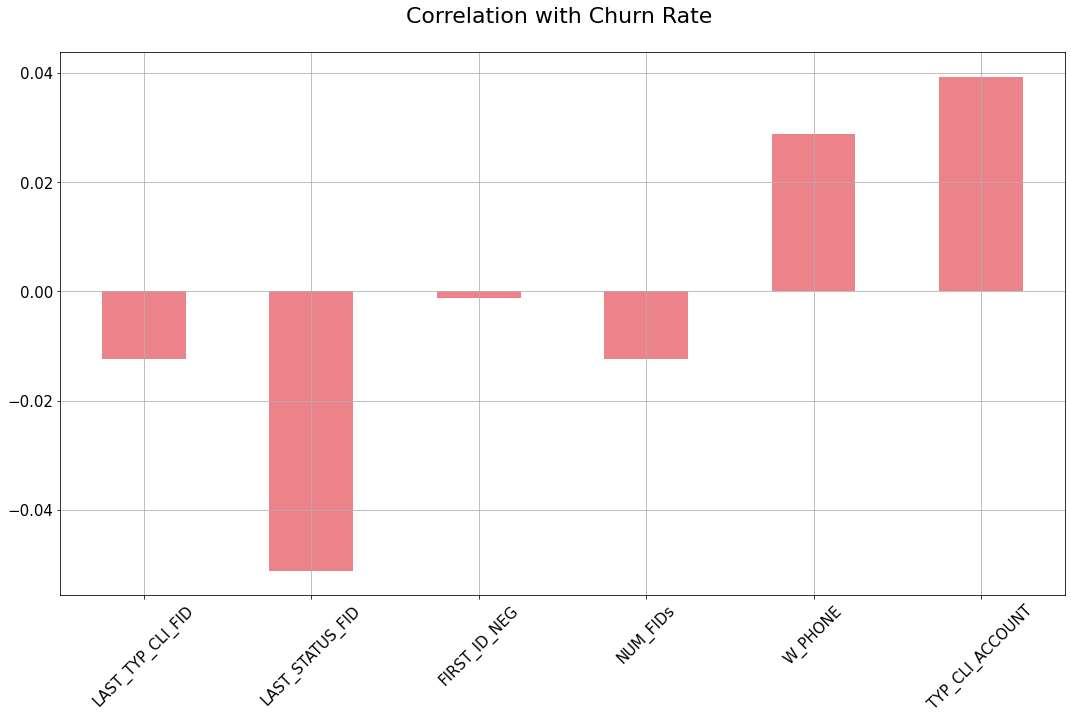

In [ ]:
df2 = df[[ 'LAST_TYP_CLI_FID', 'LAST_STATUS_FID', 'FIRST_ID_NEG', 'NUM_FIDs', 'W_PHONE', 'TYP_CLI_ACCOUNT' ]]
correlations = df2.corrwith(df.CHURN)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations = correlations[correlations<0].sort_values(ascending = False)
print('Most Positive Correlations: \n', positive_correlations)
print('\nMost Negative Correlations: \n', negative_correlations)

correlations = df2.corrwith(df.CHURN)
correlations = correlations[correlations!=1]
correlations.plot.bar(figsize = (18, 10), fontsize = 15, color = '#ec838a', rot = 45, grid = True)
plt.title('Correlation with Churn Rate \n', horizontalalignment = "center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")

La maggior correlazione positiva si ha con la variabile TYP_CLI_ACCOUNT ovvero che spiega che tipo di account ha l'utente, mentre la maggior correlazione negativa si ha con la variabile LAST_STATUS_FID che spiega se l'account è attivo oppure no.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


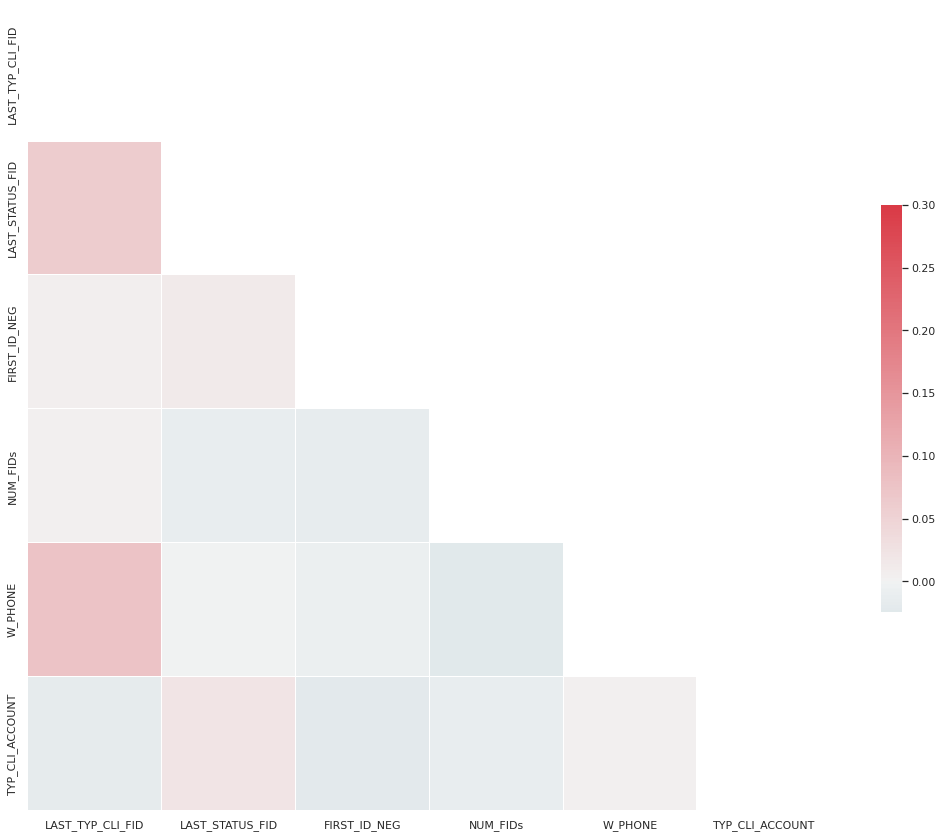

In [ ]:
#Set and compute the Correlation Matrix:
sn.set(style="white")
corr = df2.corr()
#Generate a mask for the upper triangle:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
#Set up the matplotlib figure and a diverging colormap:
f, ax = plt.subplots(figsize=(18, 15))
cmap = sn.diverging_palette(220, 10, as_cmap=True)
#Draw the heatmap with the mask and correct aspect ratio:
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
square=True, linewidths=.5, cbar_kws={"shrink": .5})

Si verifica della multicollinearità utilizzando VIF: proviamo a esaminare la multicollinearità utilizzando i fattori di inflazione variabili (VIF). A differenza della matrice di correlazione, VIF determina la forza della correlazione di una variabile con un gruppo di altre variabili indipendenti in un set di dati. VIF inizia di solito a 1 e ovunque superiore a 10 indica un'elevata multicollinearità tra le variabili indipendenti.

In [ ]:
def calc_vif(X):
  # Calculating VIF
  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i)
  for i in range(X.shape[1])]
  return(vif)
df2 = df[[ 'LAST_TYP_CLI_FID', 'LAST_STATUS_FID', 'FIRST_ID_NEG', 'NUM_FIDs', 'W_PHONE', 'TYP_CLI_ACCOUNT' ]]
calc_vif(df2)

,variables,VIF
0,LAST_TYP_CLI_FID,83.942356
1,LAST_STATUS_FID,194.439353
2,FIRST_ID_NEG,3.466903
3,NUM_FIDs,181.389542
4,W_PHONE,9.967635
5,TYP_CLI_ACCOUNT,29.333544


Si prova ad eliminare una delle caratteristiche correlate per vedere se aiuta a ridurre la multicollinearità tra le caratteristiche correlate:

In [ ]:
df.drop(['LAST_STATUS_FID'], axis=1, inplace = True)
df.drop(['NUM_FIDs'], axis=1, inplace = True)
df.drop(['LAST_TYP_CLI_FID'], axis=1, inplace = True)
def calc_vif(X):
  # Calculating VIF
  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i)
  for i in range(X.shape[1])]
  return(vif)
df2 = df[['FIRST_ID_NEG', 'W_PHONE', 'TYP_CLI_ACCOUNT' ]]
calc_vif(df2)

,variables,VIF
0,FIRST_ID_NEG,3.237202
1,W_PHONE,7.896613
2,TYP_CLI_ACCOUNT,9.055614


In [ ]:
df.drop_duplicates('ID_CLI', inplace = True)
print(df.shape)

(211608, 11)


In [ ]:
## Convert rest of categorical variable in dummy variable:
lcf = pd.get_dummies(df['LAST_COD_FID']).iloc[:,1:]
ldta = pd.get_dummies(df['LAST_DT_ACTIVE']).iloc[:,1:]
fdta = pd.get_dummies(df['FIRST_DT_ACTIVE']).iloc[:,1:]
ep = pd.get_dummies(df['EMAIL_PROVIDER']).iloc[:,1:]
tj = pd.get_dummies(df['TYP_JOB']).iloc[:,1:]

df.drop(['LAST_COD_FID', 'LAST_DT_ACTIVE', 'FIRST_DT_ACTIVE', 'EMAIL_PROVIDER', 'TYP_JOB'], axis=1, inplace = True)

df = pd.concat([df, lcf, ep, tj], axis=1)

Generazione di set di dati di addestramento e test: disaccoppiamo il set di dati master in set di addestramento e test con un rapporto dell'80%-20%.

In [ ]:
#Identify response variable:
    
response = df["CHURN"]
dataset = df.drop(columns="CHURN")

X_train, X_test, y_train, y_test = train_test_split(dataset, response, stratify=response, test_size = 0.9)
#to resolve any class imbalance - use stratify parameter.
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (21160, 42)
Number transactions y_train dataset:  (21160,)
Number transactions X_test dataset:  (190448, 42)
Number transactions y_test dataset:  (190448,)


Rimuovere gli identificatori: separare "ID_CLI" dai frame di dati di addestramento e test.

In [ ]:
train_identity = X_train['ID_CLI']
X_train = X_train.drop(columns = ['ID_CLI'])
test_identity = X_test['ID_CLI']
X_test = X_test.drop(columns = ['ID_CLI'])

**Ridimensionamento delle funzionalità.**
È importante normalizzare le variabili prima di eseguire qualsiasi algoritmo di apprendimento automatico (classificazione) in modo che tutte le variabili di addestramento e test vengano ridimensionate in un intervallo da 0 a 1.

In [ ]:
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

L'accuracy della classificazione è una delle metriche di valutazione della classificazione più comuni per confrontare gli algoritmi di base in quanto rappresenta il numero di previsioni corrette effettuate come rapporto delle previsioni totali. Tuttavia, non è la metrica ideale quando vi sono problemi di sbilanciamento di classe. Quindi, si ordinano i risultati in base al valore **Mean AUC** che non è altro che la capacità del modello di discriminare tra classi positive e negative.

In [ ]:
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = 0,
                                                         class_weight='balanced')))
models.append(('SVC', SVC(kernel = 'linear', random_state = 0)))
models.append(('Kernel SVM', SVC(kernel = 'rbf', random_state = 0)))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)))
models.append(('Gaussian NB', GaussianNB()))
models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))
models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, criterion = 'entropy', random_state = 0)))
#Evaluating Model Results:
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame(columns=col)
i = 0
# Evaluate each model using k-fold cross-validation:
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10, random_state=None)
    start = datetime.now().timestamp()
    # accuracy scoring:
    cv_acc_results = model_selection.cross_val_score(  
    model, X_train, y_train, cv=kfold, scoring='accuracy')
    # roc_auc scoring:
    cv_auc_results = model_selection.cross_val_score(  
    model, X_train, y_train, cv=kfold, scoring='roc_auc')
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,
                        round(cv_auc_results.mean()*100, 2),
                        round(cv_auc_results.std()*100, 2),
                        round(cv_acc_results.mean()*100, 2),
                        round(cv_acc_results.std()*100, 2)
                        ]
    i += 1
    end = datetime.now().timestamp()
    print(i, name, (end-start))
        
model_results.sort_values(by=['ROC AUC Mean'], ascending=False)

1 Logistic Regression 5.341472864151001
2 SVC 600.0664949417114
3 Kernel SVM 761.4880650043488
4 KNN 18.57797598838806
5 Gaussian NB 0.5823359489440918
6 Decision Tree Classifier 4.932557106018066
7 Random Forest 86.1184151172638


,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
2,Kernel SVM,69.76,1.74,70.72,1.41
6,Random Forest,68.34,0.80,65.45,0.75
3,KNN,67.13,0.82,66.78,0.54
0,Logistic Regression,66.08,1.60,61.17,1.43
1,SVC,65.78,1.60,68.96,1.54
4,Gaussian NB,64.19,1.73,60.33,0.97
5,Decision Tree Classifier,61.80,0.60,63.36,0.67


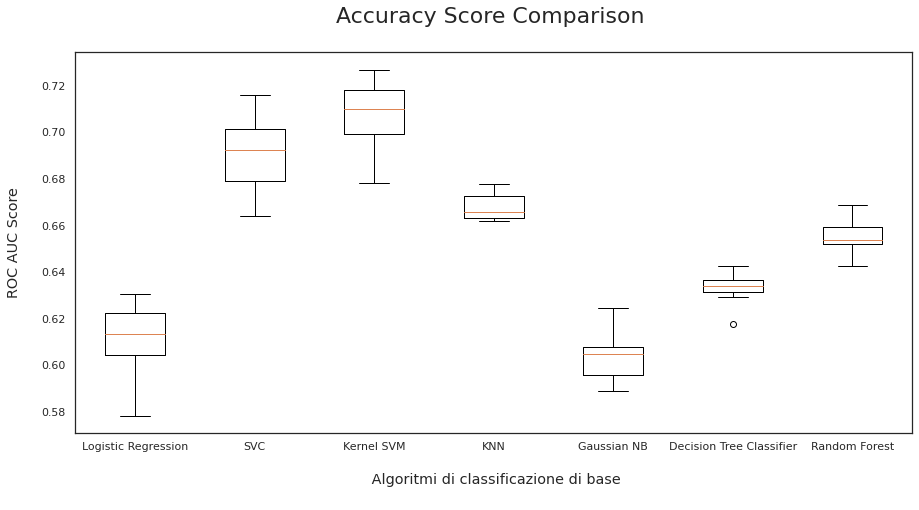

In [ ]:
#Visualizzare i confronti di precisione degli algoritmi di classificazione
fig = plt.figure(figsize=(15, 7)) 
ax = fig.add_subplot(111) 
plt.boxplot(acc_results) 
ax.set_xticklabels(names)
plt.ylabel('ROC AUC Score\n', horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Algoritmi di classificazione di base\n', horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Accuracy Score Comparison \n', horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='in alto a destra', fontsize = "medium") 
plt.xticks(rotation=0, horizontalalignment="center") 
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

Utilizzo dell'area sotto la curva ROC: dalla prima iterazione degli algoritmi di classificazione di base, possiamo vedere che la SVM hanno sovraperformato gli altri cinque modelli per il set di dati scelto con i punteggi AUC medi più alti. Riconfermiamo i nostri risultati nella seconda iterazione come mostrato nei passaggi successivi.

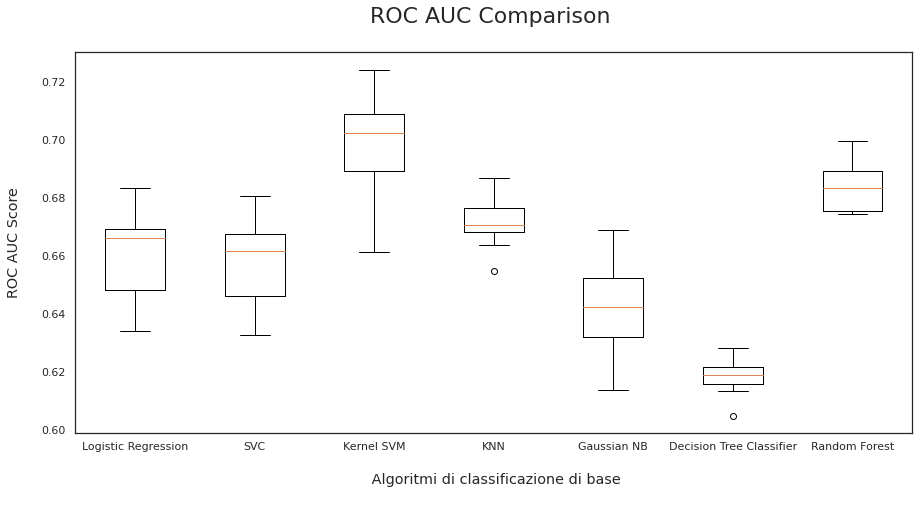

In [ ]:
fig = plt.figure(figsize=(15, 7)) 
ax = fig.add_subplot(111) 
plt.boxplot(auc_results) 
ax.set_xticklabels(names)
plt.ylabel('ROC AUC Score\n', horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Algoritmi di classificazione di base\n', horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('ROC AUC Comparison \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='in alto a destra', fontsize = "medio") 
plt.xticks(rotation=0, horizontalalignment="center") 
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

Ottenere i parametri giusti per i modelli di base: prima di eseguire la seconda iterazione, si ottimizzano i parametri e si finalizzano le metriche di valutazione per la selezione del modello.

Identificare il numero ottimale di K vicini per il modello KNN: nella prima iterazione, abbiamo assunto che K = 3, ma in realtà non sappiamo quale sia il valore K ottimale che fornisce la massima precisione per il set di dati di addestramento scelto. Pertanto, scriviamo un ciclo for che itera da 20 a 30 volte e dia l'accuratezza ad ogni iterazione in modo da calcolare il numero ottimale di K vicini per il modello KNN.

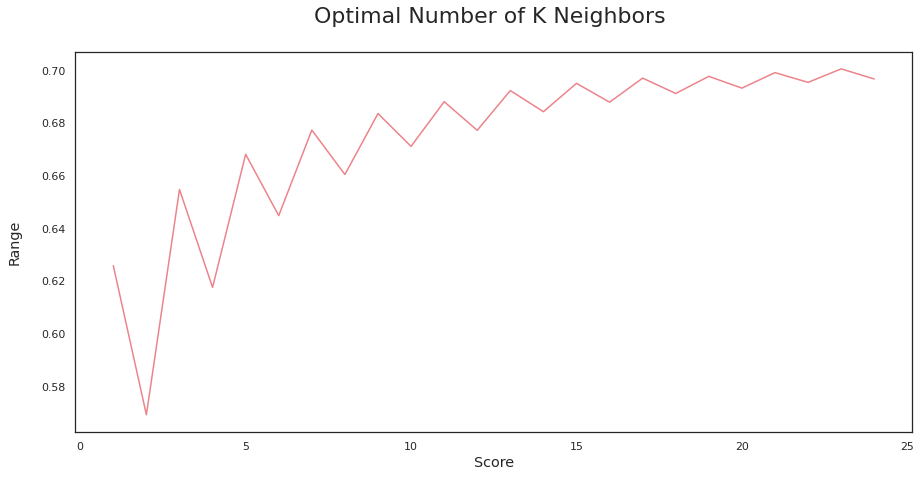

In [ ]:
score_array = []
for each in range(1,25):
    knn_loop = KNeighborsClassifier(n_neighbors = each) 
#set K neighbor as 3
    knn_loop.fit(X_train,y_train)
    score_array.append(knn_loop.score(X_test,y_test))
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,25),score_array, color = '#ec838a')
plt.ylabel('Range\n',horizontalalignment="center", fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center", fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Optimal Number of K Neighbors \n', horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

Come possiamo vedere dalle iterazioni precedenti, se utilizziamo K = 23, otterremo il punteggio massimo del 70%.

Identificare il numero ottimale di alberi per il modello Random Forest: abbastanza simile alle iterazioni nel modello KNN, qui stiamo cercando di trovare il numero ottimale di alberi decisionali per comporre la migliore foresta casuale.

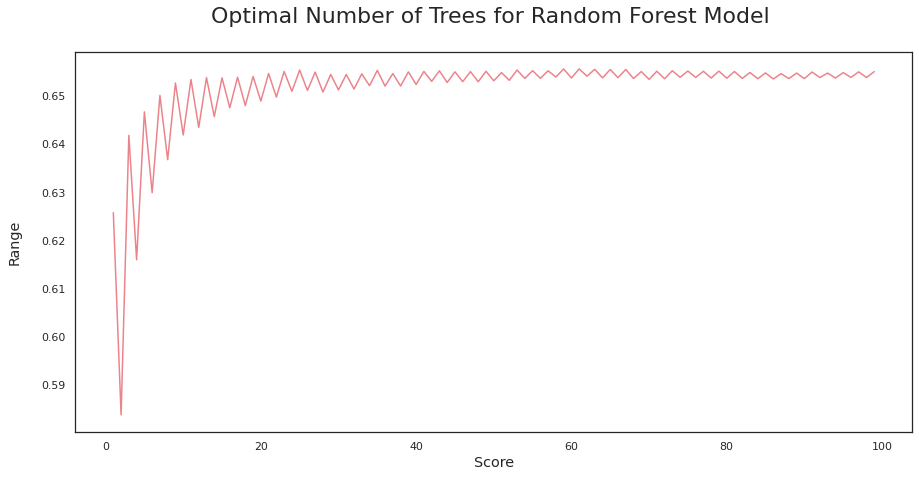

In [ ]:
score_array = []
for each in range(1,100):
    rf_loop = RandomForestClassifier(
n_estimators = each, random_state = 1) 
    rf_loop.fit(X_train,y_train)
    score_array.append(rf_loop.score(X_test,y_test))
 
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,100),score_array, color = '#ec838a')
plt.ylabel('Range\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.title('Optimal Number of Trees for Random Forest Model \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

Confronta algoritmi di classificazione di base (2a iterazione):

Nella seconda iterazione del confronto degli algoritmi di classificazione di base, utilizzeremo i parametri ottimizzati per i modelli KNN e Random Forest. Inoltre, sappiamo che i falsi negativi sono più costosi dei falsi positivi in ​​una churn e quindi utilizziamo i punteggi di precisione, richiamo e F2 come metrica ideale per la selezione del modello.

In [ ]:
## Logistic Regression

# Fitting Logistic Regression to the Training set
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1, f2]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Logistic Regression   0.69859    0.70424  0.865242  0.776483   0.82741


In [ ]:
## Support Vector Machine (linear classifier)

# Fitting SVM (SVC class) to the Training set
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results y_pred = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([['SVM (Linear)', acc, prec, rec, f1, f2]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Logistic Regression   0.69859    0.70424  0.865242  0.776483   0.82741
1         SVM (Linear)   0.69859    0.70424  0.865242  0.776483   0.82741


In [ ]:
## K-Nearest Neighbors

# Fitting KNN to the Training set:
classifier = KNeighborsClassifier(n_neighbors = 22, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
# Predicting the Test set results 
y_pred  = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([['K-Nearest Neighbours', acc, prec, rec, f1, f2]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
print (results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0   Logistic Regression   0.69859    0.70424  0.865242  0.776483  0.827410
1          SVM (Linear)   0.69859    0.70424  0.865242  0.776483  0.827410
2  K-Nearest Neighbours   0.69524    0.69624  0.880463  0.777589  0.836211


In [ ]:
## Kernel SVM

# Fitting Kernel SVM to the Training set:
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results 
y_pred = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([['Kernel SVM', acc, prec, rec, f1, f2]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
print (results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0   Logistic Regression  0.698590   0.704240  0.865242  0.776483  0.827410
1          SVM (Linear)  0.698590   0.704240  0.865242  0.776483  0.827410
2  K-Nearest Neighbours  0.695240   0.696240  0.880463  0.777589  0.836211
3            Kernel SVM  0.705888   0.696042  0.912345  0.789649  0.858959


In [ ]:
## Naive Byes

# Fitting Naive Byes to the Training set:
classifier = GaussianNB()
classifier.fit(X_train, y_train)
# Predicting the Test set results 
y_pred = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([['Naive Byes', acc, prec, rec, f1, f2]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
print (results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0   Logistic Regression  0.698590   0.704240  0.865242  0.776483  0.827410
1          SVM (Linear)  0.698590   0.704240  0.865242  0.776483  0.827410
2  K-Nearest Neighbours  0.695240   0.696240  0.880463  0.777589  0.836211
3            Kernel SVM  0.705888   0.696042  0.912345  0.789649  0.858959
4            Naive Byes  0.603293   0.610665  0.950146  0.743486  0.855075


In [ ]:
## Decision Tree

# Fitting Decision Tree to the Training set:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results 
y_pred = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([['Decision Tree', acc, prec, rec, f1, f2]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
print (results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0   Logistic Regression  0.698590   0.704240  0.865242  0.776483  0.827410
1          SVM (Linear)  0.698590   0.704240  0.865242  0.776483  0.827410
2  K-Nearest Neighbours  0.695240   0.696240  0.880463  0.777589  0.836211
3            Kernel SVM  0.705888   0.696042  0.912345  0.789649  0.858959
5         Decision Tree  0.628234   0.693491  0.690999  0.692243  0.691496
4            Naive Byes  0.603293   0.610665  0.950146  0.743486  0.855075


In [ ]:
## Random Forest

# Fitting Random Forest to the Training set:
    
classifier = RandomForestClassifier(n_estimators = 72, 
criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results 
y_pred = classifier.predict(X_test)
#Evaluate results
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([['Random Forest', acc, prec, rec, f1, f2]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
print (results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0   Logistic Regression  0.698590   0.704240  0.865242  0.776483  0.827410
1          SVM (Linear)  0.698590   0.704240  0.865242  0.776483  0.827410
6         Random Forest  0.651884   0.698329  0.747657  0.722151  0.737242
2  K-Nearest Neighbours  0.695240   0.696240  0.880463  0.777589  0.836211
3            Kernel SVM  0.705888   0.696042  0.912345  0.789649  0.858959
4         Decision Tree  0.628234   0.693491  0.690999  0.692243  0.691496
5            Naive Byes  0.603293   0.610665  0.950146  0.743486  0.855075


Dalla 2a iterazione, possiamo concludere definitivamente che la regressione logistica è un modello ottimale di scelta per il set di dati dato in quanto ha la combinazione relativamente più alta di precision, recall e F1 score; fornendo il maggior numero di previsioni positive corrette riducendo al minimo i falsi negativi. Quindi, proviamo a utilizzare la regressione logistica e ne valutiamo le prestazioni nelle prossime sezioni.

## Valutazione del modello

Addestrare e valutare il modello scelto: adattiamo il modello selezionato (in questo caso la regressione logistica) al set di dati di addestramento e valutiamo i risultati.

In [ ]:
classifier = LogisticRegression(random_state = 0, penalty = 'l2')
classifier.fit(X_train, y_train)
# Predict the Test set results
y_pred = classifier.predict(X_test)
#Evaluate Model Results on Test Set:
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1, f2]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
print(results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Logistic Regression   0.69859    0.70424  0.865242  0.776483   0.82741


K-Fold Cross-Validation: la valutazione del modello viene più comunemente eseguita attraverso la tecnica "K-fold Cross-Convalidation" che aiuta principalmente a correggere la varianza. Il problema della varianza si verifica quando otteniamo una buona precisione durante l'esecuzione del modello su un set di addestramento e un set di test, ma l'accuratezza appare diversa quando il modello viene eseguito su un altro set di dati di test.

Quindi, per risolvere il problema della varianza, la convalida incrociata k-fold ha sostanzialmente diviso il set di addestramento in 10 "folds" e addestra il modello su 9 "folds" (9 sottoinsiemi del set di dati di addestramento) prima di testarlo nel ripiegamento di prova. Questo permette di dare la flessibilità di addestrare il nostro modello su tutte e dieci le combinazioni di 9 "folds", dando ampio spazio per finalizzare la varianza.

In [ ]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Logistic Regression Classifier Accuracy: %0.2f (+/- %0.2f)"  % (accuracies.mean(), accuracies.std() * 2))

Logistic Regression Classifier Accuracy: 0.70 (+/- 0.02)


Pertanto, i risultati di convalida incrociata k-fold ottenuti indicano che avremmo un'accuratezza compresa tra il 68% e l'72% durante l'esecuzione di questo modello su qualsiasi set di test.

Di seguito si visualizzano i risultati all'interno una matrice di confusione: tale matrice di confusione indica che abbiamo 98870 + 34037 previsioni corrette e 41175 + 16366 previsioni errate.

Tasso di precisione = numero di previsioni corrette/pronostici totali * 100 = 132907 / 190448 * 100 = 69,79%

Tasso di errore = numero di previsioni errate/pronostici totali * 100 = 57541 / 190448 * 100 = 30,21%

Pertanto si ha una precisione del quasi 70%.

Text(0.5, 12.5, 'Predicted label\n')

<Figure size 2016x1440 with 0 Axes>

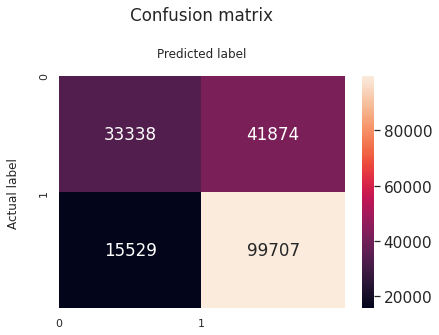

In [ ]:
cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))
fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

**Valutazione del modello usando il grafico ROC.**

Si rivaluta il modello usando il grafico ROC. Il grafico ROC mostra la capacità di un modello di distinguere tra le classi in base al punteggio medio AUC. 

La linea arancione rappresenta la curva ROC di un classificatore casuale mentre un buon classificatore cerca di rimanere il più lontano possibile da quella linea. Come mostrato nel grafico seguente, il modello di regressione logistica perfezionato ha mostrato un punteggio AUC più elevato.

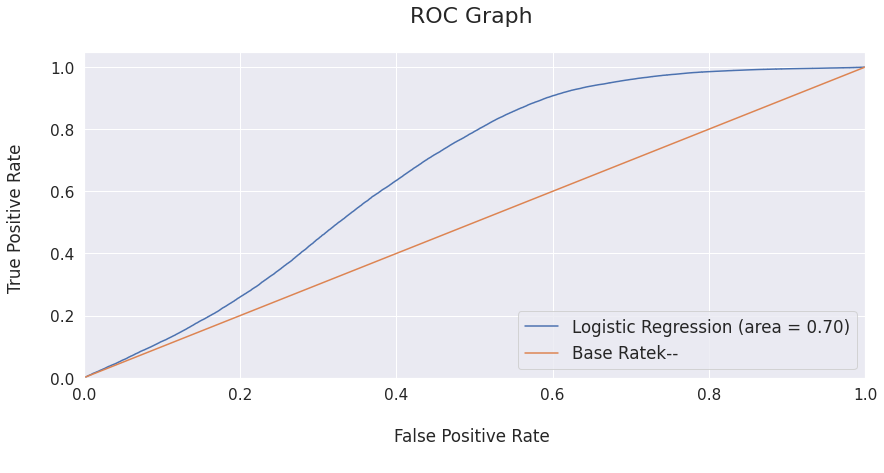

In [ ]:
classifier.fit(X_train, y_train) 
probs = classifier.predict_proba(X_test) 
probs = probs[:, 1] 
classifier_roc_auc = accuracy_score(y_test, y_pred )
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))
# Plot Logistic Regression ROC
plt.plot(rf_fpr, rf_tpr, 
label='Logistic Regression (area = %0.2f)' % classifier_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.title('ROC Graph \n',horizontalalignment="center", 
fontstyle = "normal", fontsize = "22", 
fontfamily = "sans-serif")
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

## Prevedere l'importanza delle caratteristiche
La regressione logistica ci consente di determinare le caratteristiche chiave che hanno significato nella previsione dell'attributo target ("Churn").

Il modello di regressione logistica prevede che il tasso di abbandono aumenterebbe positivamente con contratto standard, email account provider con gmail, libero, hotmail.

D'altra parte, il modello prevede una correlazione negativa con l'abbandono se un cliente ha un programma fedeltà, lo store in cui ha acquistato oppure se è disoccupato.

In [ ]:
# Analyzing Coefficients
feature_importances = pd.concat([pd.DataFrame(dataset.drop(columns = 'ID_CLI').columns, columns = ["features"]), 
                                 pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])],axis = 1)
feature_importances.sort_values("coef", ascending = False)

,features,coef
10,gmail.com,0.096499
5,STANDARD,0.064086
11,gmail.it,0.062440
13,hotmail.it,0.055449
16,libero.it,0.050728
20,other,0.043221
26,yahoo.it,0.040857
7,alice.it,0.033704
12,hotmail.com,0.029327
18,live.it,0.027784


## Miglioramento del modello
Il miglioramento del modello implica fondamentalmente la scelta dei migliori parametri per il modello di apprendimento automatico che abbiamo elaborato. Esistono due tipi di parametri in qualsiasi modello di apprendimento automatico: il primo tipo è il tipo di parametri che il modello apprende; i valori ottimali trovati automaticamente eseguendo il modello. Il secondo tipo di parametri sono quelli che l'utente può scegliere durante l'esecuzione del modello. Tali parametri sono chiamati iperparametri; un insieme di valori configurabili esterni a un modello che non può essere determinato dai dati e che stiamo cercando di ottimizzare attraverso tecniche di Parameter Tuning come Random Search o Grid Search.

L'ottimizzazione degli iperparametri potrebbe non migliorare il modello ogni volta. Ad esempio, cercando di ottimizzare ulteriormente il modello si è ottenuto un punteggio di precisione inferiore a quello predefinito. Tutto ciò serve per dimostrare i passaggi coinvolti nell'ottimizzazione degli iperparametri.

Regolazione dei parametri ipertestuali tramite la Grid Search.

In [ ]:
# Round 2:
# Select Regularization Method
import time
penalty = ['l2']
# Create regularization hyperparameter space
C = [ 0.0001, 0.001, 0.01, 0.02, 0.05]
# Combine Parameters
parameters = dict(C=C, penalty=penalty)
lr_classifier = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = "balanced_accuracy",
                           cv = 10,
                           n_jobs = -1)
t0 = time.time()
lr_classifier  = lr_classifier .fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))
lr_best_accuracy = lr_classifier.best_score_
lr_best_parameters = lr_classifier.best_params_
lr_best_accuracy, lr_best_parameters

Took 7.87 seconds


(0.656464988087951, {'C': 0.01, 'penalty': 'l2'})

In [ ]:
lr_classifier = LogisticRegression(random_state = 0, penalty = 'l2')
lr_classifier.fit(X_train, y_train)
# Predict the Test set results
y_pred = lr_classifier.predict(X_test)
#probability score
y_pred_probs = lr_classifier.predict_proba(X_test)
y_pred_probs  = y_pred_probs [:, 1]

## Future Predictions
Comparazione delle predizioni con il test set a selezionato precedentemente.

[[34037 41175]
 [16366 98870]]
Test Data Accuracy: 0.6979


<Figure size 2016x1440 with 0 Axes>

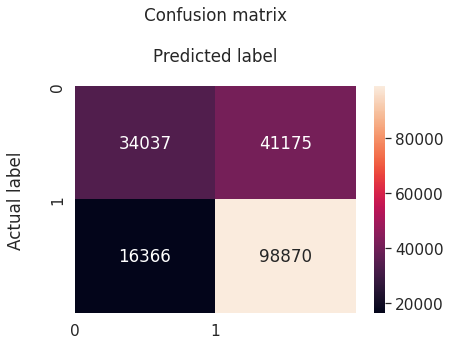

In [ ]:
#Revalidate final results with Confusion Matrix:
cm = confusion_matrix(y_test, y_pred) 
print (cm)
#Confusion Matrix as a quick Crosstab:
    
pd.crosstab(y_test,pd.Series(y_pred),
rownames=['ACTUAL'],colnames=['PRED'])
#visualize Confusion Matrix:
cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))
fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g'#,cmap="YlGnBu" 
           )
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

**Formattazione dei risultati finali.**
È sempre una buona pratica costruire un punteggio di propensione oltre a un risultato assoluto previsto. Invece di recuperare solo un risultato target stimato binario (0 o 1), ogni "ID cliente" potrebbe ottenere un punteggio di propensione che evidenzia la percentuale di probabilità di intraprendere l'azione target ("churn").

In [ ]:
final_results = pd.concat([test_identity, y_test], axis = 1).dropna()
final_results['predictions'] = y_pred
final_results["propensity_to_churn(%)"] = y_pred_probs
final_results["propensity_to_churn(%)"] = final_results["propensity_to_churn(%)"]*100
final_results["propensity_to_churn(%)"]=final_results["propensity_to_churn(%)"].round(2)
final_results = final_results[['ID_CLI', 'CHURN', 'predictions', 'propensity_to_churn(%)']]
final_results ['Ranking'] = pd.qcut(final_results['propensity_to_churn(%)'].rank(method = 'first'),10,labels=range(10,0,-1))
print (final_results)

         ID_CLI  CHURN  predictions  propensity_to_churn(%) Ranking
2433053  392265      1            1                   74.81       2
3204295  259014      1            1                   77.96       2
275698   799859      0            0                   48.53       8
3614925  171280      1            1                   79.40       1
76368    875742      0            0                   37.84      10
...         ...    ...          ...                     ...     ...
2712563   27584      1            1                   69.17       4
2261552  417597      0            1                   65.16       5
1311502  571215      0            1                   60.39       6
2215944  424895      0            1                   72.97       3
1145233   40945      0            1                   53.35       7

[190448 rows x 5 columns]


## Conclusione

Pertanto in questo progetto abbiamo utilizzato il merge di 5 set di dati per raccogliere maggiori informazioni sui clienti al fine di creare un classificatore di apprendimento automatico che prevede la propensione di qualsiasi cliente ad abbandonare nei mesi a venire con un punteggio di accuratezza compreso tra il 68% e il 72%.